In [6]:
import warnings
warnings.filterwarnings('ignore')
import os
import IPython.display as ipd

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import librosa
import librosa.display
import sklearn

plt.rcParams['figure.figsize'] = (17, 5)

In [7]:
file = '../data/music/000002.mp3'
y, sr = librosa.load(file, sr=None, mono=True,duration = 30)
start, end = 0,30
ipd.Audio(data=y[start*sr:end*sr], rate=sr)

### Waveplot

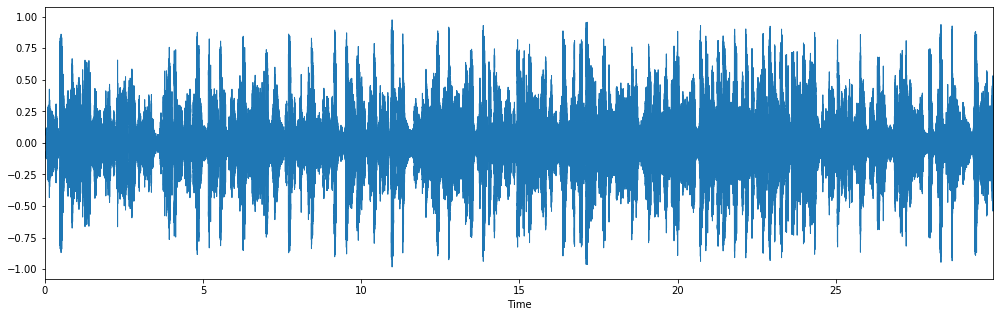

In [8]:
librosa.display.waveplot(y, sr=sr);

### Creating Spectogram

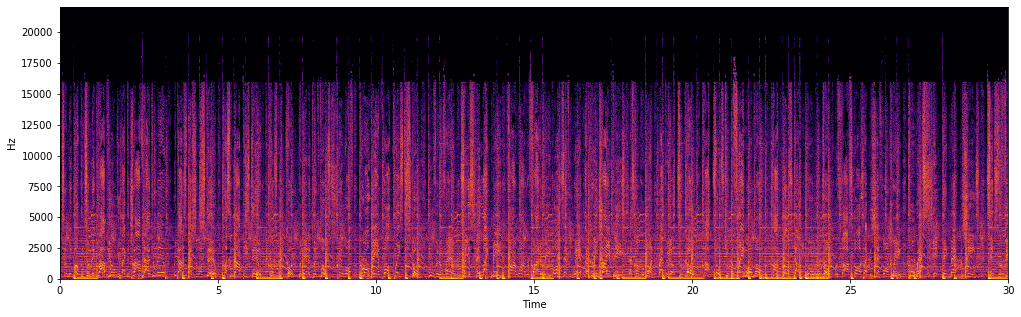

In [9]:
cmap = plt.get_cmap('inferno')
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz',cmap=cmap)
plt.show()

### Creating Mel Spectogram

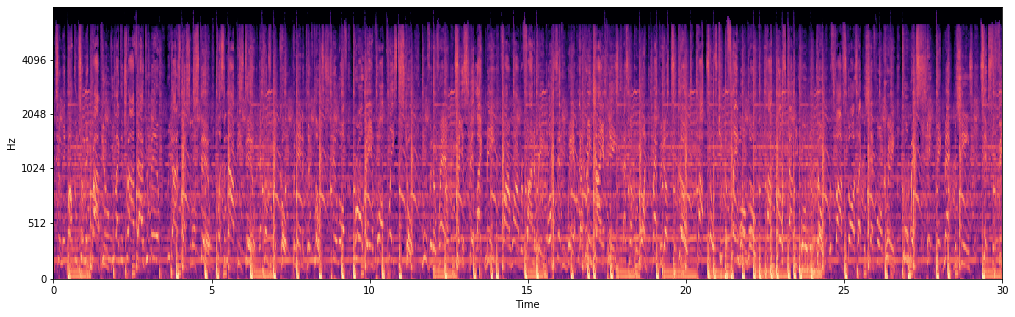

In [10]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

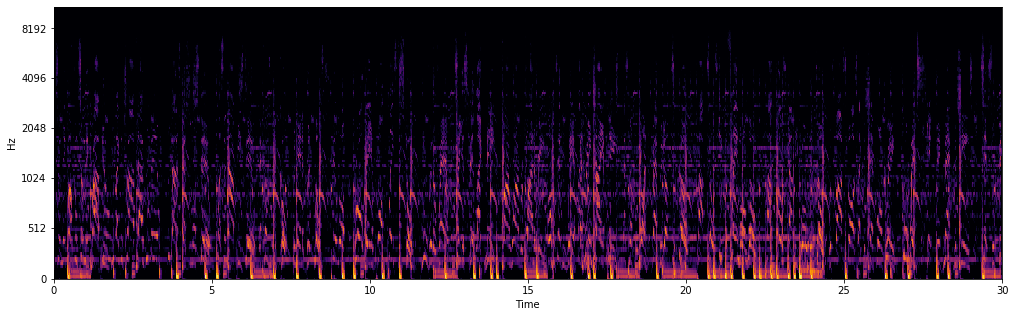

In [13]:
stft = np.abs(librosa.stft(y))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
log_mel = librosa.amplitude_to_db(mel)
librosa.display.specshow(log_mel, sr=sr, cmap=cmap,x_axis='time', y_axis='mel')
plt.show()  

### Chroma 

A chroma vector is a typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, ..., B}, is present in the signal.

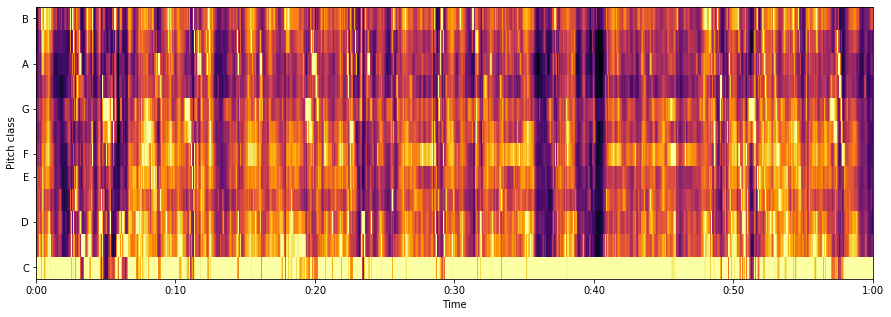

In [14]:
chromagram = librosa.feature.chroma_cqt(y, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap=cmap);

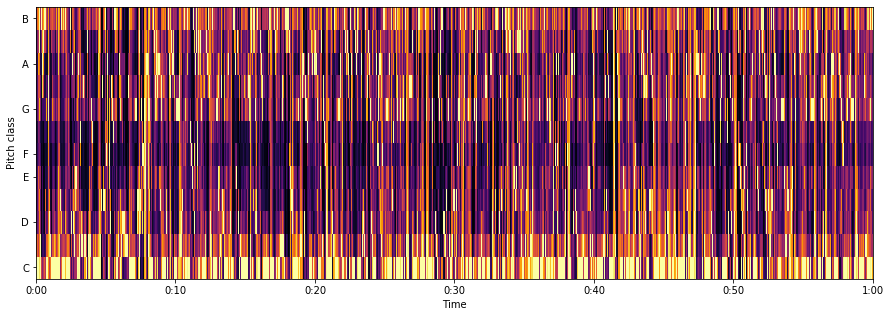

In [15]:
chromagram = librosa.feature.chroma_stft(y, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap=cmap);

Chroma energy normalized statistics. The main idea of CENS features is that taking statistics over large windows smooths local deviations in tempo, articulation, and musical ornaments such as trills and arpeggiated chords. CENS are best used for tasks such as audio matching and similarity.

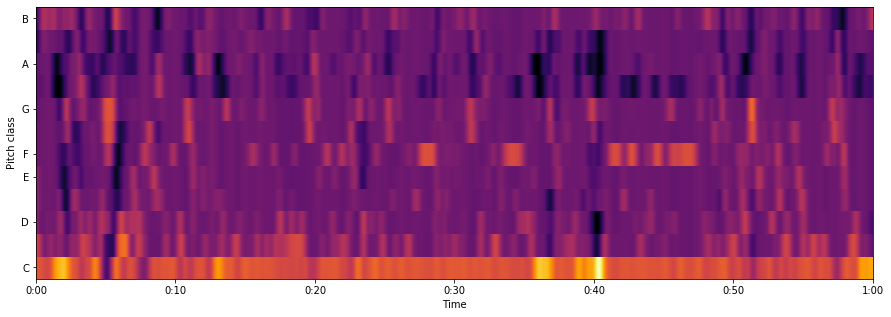

In [16]:
chromagram = librosa.feature.chroma_cens(y, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap=cmap);

### Spectral Centroid

The spectral centroid (Wikipedia) indicates at which frequency the energy of a spectrum is centered upon. This is like a weighted mean:

fc=∑kS(k)f(k)∑kS(k)
 
where  S(k)  is the spectral magnitude at frequency bin  k ,  f(k)  is the frequency at bin  k .

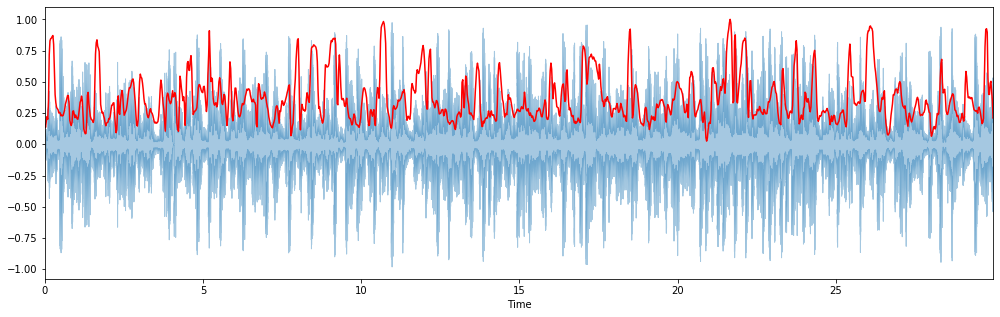

In [22]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r');

### Spectral Bandwidth
librosa.feature.spectral_bandwidth computes the order- p  spectral bandwidth:

(∑kS(k)(f(k)−fc)p)1p
 
where  S(k)  is the spectral magnitude at frequency bin  k ,  f(k)  is the frequency at bin  k , and  fc  is the spectral centroid. When  p=2 , this is like a weighted standard deviation.

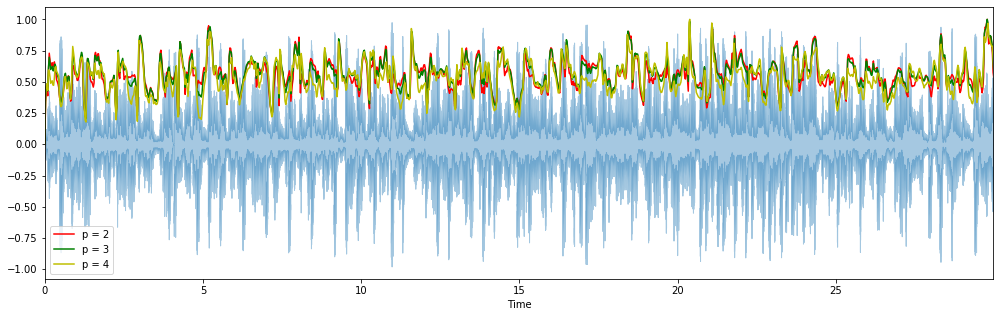

In [26]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(17,5))
librosa.display.waveplot(y, sr=sr, alpha=0.4);
plt.plot(t, normalize(spectral_bandwidth_2), color='r');
plt.plot(t, normalize(spectral_bandwidth_3), color='g');
plt.plot(t, normalize(spectral_bandwidth_4), color='y');
plt.legend(('p = 2', 'p = 3', 'p = 4'));

### Spectral Contrast
Spectral contrast considers the spectral peak, the spectral valley, and their difference in each frequency subband

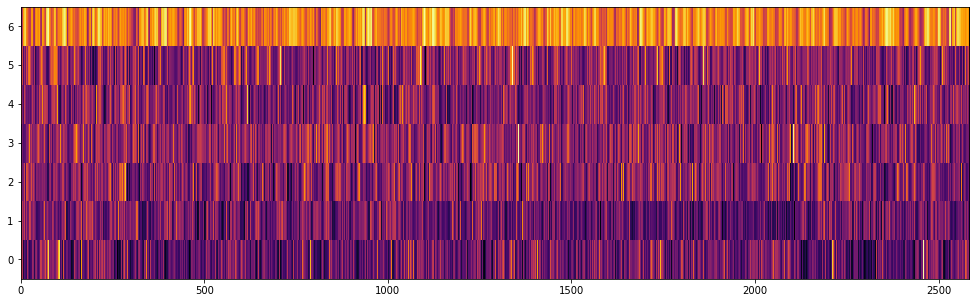

In [27]:
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr)
plt.figure(figsize=(17,5))

plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap=cmap);

### Spectral Rolloff
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

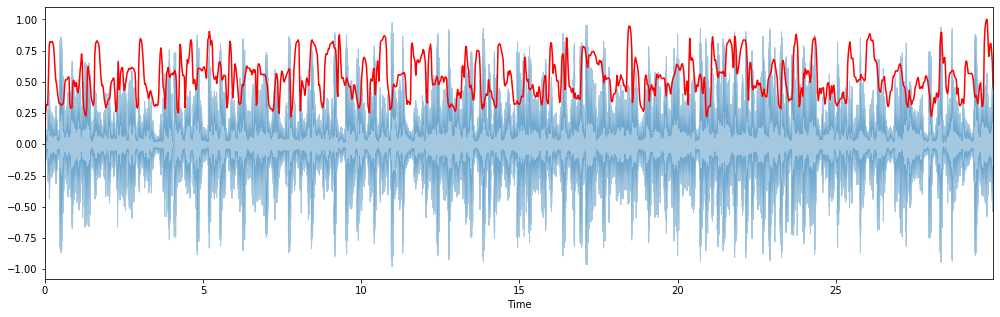

In [31]:
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
plt.figure(figsize=(17,5))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r');

### Zero Crossing Rate
The zero crossing rate indicates the number of times that a signal crosses the horizontal axis

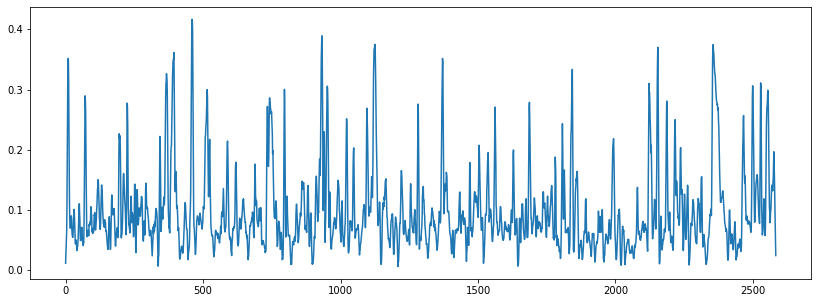

In [34]:
zcr = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(14, 5))
plt.plot(zcr[0]);

### Tonnetz

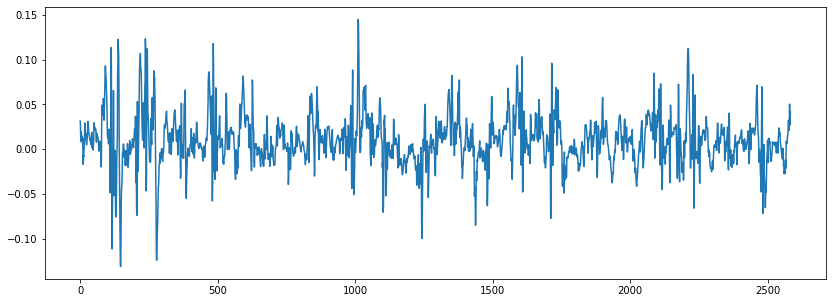

In [35]:
tonnetz = librosa.feature.tonnetz(y, sr=sr)
plt.figure(figsize=(14, 5))
plt.plot(tonnetz[0]);

### RMSE

The root-mean-square energy (RMSE) in a signal is defined as

1N∑n|x(n)|2‾‾‾‾‾‾

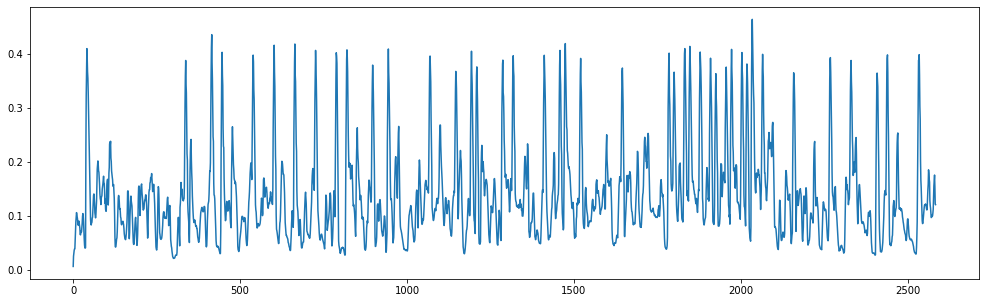

In [37]:
rmse = librosa.feature.rms(y)
plt.plot(rmse[0]);

### Mel Frequency Cepstral Coefficients (MFCCs)
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope. In MIR, it is often used to describe timbre.

In [92]:
print(mfccs.shape)

(20, 2584)


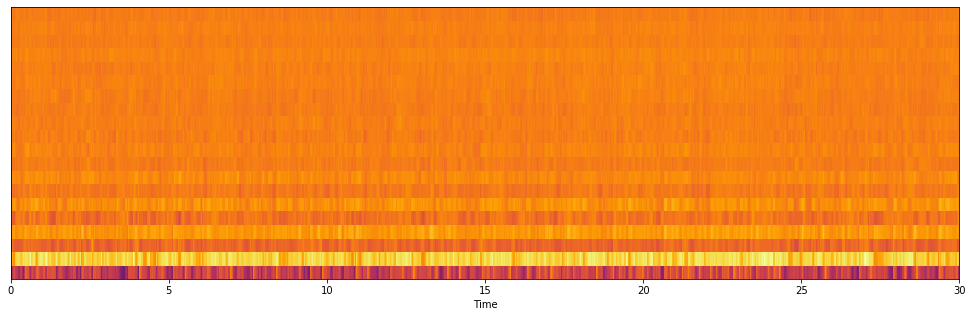

In [38]:
mfccs = librosa.feature.mfcc(y, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time',cmap=cmap);
